# Development Notebooks

## Confluence Identification Tool

Usage Notes:


Outputs:


by Shane Putnam: sputnam@dewberry.com

In [1]:
import os
from osgeo import gdal, ogr
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.mask import mask

### Load the stream network and the catchment boundary:

cellsize=10.0

In [2]:
stream_grid=r'P:\Temp\sputnam\data\md_streamgrid.tif'
huc_poly=r'P:\Temp\sputnam\data\RockCreekWS\RockCreekWS.geojson'
out_tif=r'P:\Temp\sputnam\data\rock_creek_clip.tif'

### Read in the Raster

In [3]:
data = rasterio.open(stream_grid)
raster_crs = data.crs

In [4]:
#show((data, 1), cmap='terrain')

### Read in Shapefile

In [5]:
gdf = gpd.read_file(huc_poly)
gdf = gdf.to_crs(raster_crs)
geom = gdf.geometry[0]

In [6]:
gdf.plot()

### Mask Raster Data & Write to file

In [7]:
out_img, out_transform = mask(dataset=data, shapes=geom, crop=True)
out_meta = data.meta.copy()

In [8]:
out_meta.update({"driver": "GTiff","height": out_img.shape[1], "width": out_img.shape[2], "transform": out_transform,"crs":raster_crs})

In [9]:
with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(out_img)

### Read masked data & plot

In [10]:
clipped = rasterio.open(out_tif)

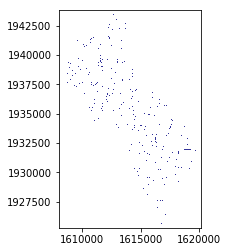

In [13]:
show((clipped, 1), cmap='terrain')